# Data Processing

### Steps :

1) Preprocess data and convert images into (256,256) dimensions.
2) Generate a permuation key (k1)
3) Scramble images wrt k1
4) Apply POB number system with key (10,5) ~ (n,r)
5) Normalise images as:
    $$ \hat{E}_{j} = {{E_{j} - E_{min}}\over{E_{max}-E_{min}}}$$


Imports

In [1]:
import utils.Encryption as cen
from PIL import Image
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Notebook will cover given pre-processing steps for a single directory.

In [2]:
root_dir = "F:\\pps_paper\\dataset\\train"
raw_dir = root_dir + "\\Data"
meta_data = raw_dir +"\\ISIC-2017_Training_Data_metadata.csv"
encrypted_dir = root_dir+"\\DataE" 
key_path = 'key.json'  

#### Generate key (k1)
Images will be converted into 256\*256 dimensions,
hence generate key of length 256\*256 with values (1,256\*256) in random permuted order.
(For now random permutations is used instead of generating key using chaotic nature of logistic map.)

In [ ]:
length = 256*256
cen.generate_and_save_key(length, key_path)

Define a function which does steps 3 to 5 sequentially

In [5]:
def total_encryption(image, key: dict, pob_values: list):
    image = cen.preprocess(image)
    image = cen.scramble(image,key)
    image = cen.encrypt(image,pob_values)
    return image

Let's loop over a directory and encrypt all the images.

In [3]:
pob_values = cen.generate_pob_values()
key = None
with open('key.json','r') as fp:
    key = json.load(fp)

In [23]:
cen.loop_over_dataset(raw_dir,encrypted_dir,lambda image: total_encryption(image, key, pob_values), metadata_path=meta_data)

100%|██████████| 2000/2000 [15:28<00:00,  2.15it/s]


Encrypting remaining dirs

In [9]:
cen.loop_over_dataset(f'{root_dir}\\GroundTruth_1',f'{root_dir}\\GroundTruth_1E',lambda image: total_encryption(image, key, pob_values),format='png')
cen.loop_over_dataset(f'F:\\pps_paper\\dataset\\test\\Data',f'F:\\pps_paper\\dataset\\test\\DataE',action = lambda image: total_encryption(image, key, pob_values) , metadata_path="F:\\pps_paper\\dataset\\test\\Data\\ISIC-2017_Test_v2_Data_metadata.csv" )
cen.loop_over_dataset(f'F:\\pps_paper\\dataset\\test\\GroundTruth_1',f'F:\\pps_paper\\dataset\\test\\GroundTruth_1E',lambda image: total_encryption(image, key, pob_values),format='png')
cen.loop_over_dataset(f'F:\\pps_paper\\dataset\\validation\\Data',f'F:\\pps_paper\\dataset\\validation\\DataE',lambda image: total_encryption(image, key, pob_values), metadata_path="F:\\pps_paper\\dataset\\validation\\Data\\ISIC-2017_Validation_Data_metadata.csv")
cen.loop_over_dataset(f'F:\\pps_paper\\dataset\\validation\\GroundTruth_1',f'F:\\pps_paper\\dataset\\validation\\GroundTruth_1E',lambda image: total_encryption(image, key, pob_values),format='png') 

100%|██████████| 150/150 [00:24<00:00,  6.05it/s]


Scrambling and unscrambling example:

<Figure size 432x288 with 0 Axes>

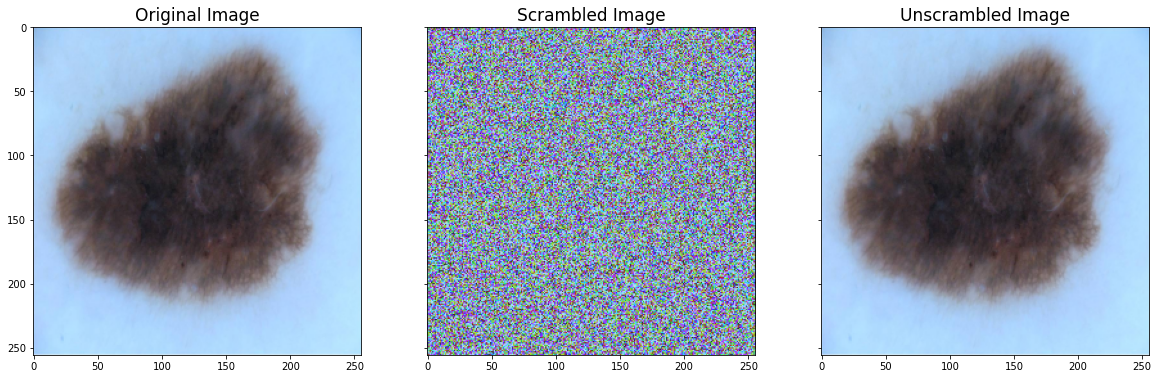

In [11]:
image = Image.open(f'{raw_dir}\\ISIC_0000000.jpg')
image = np.asarray(image)
image = cen.preprocess(image)
plt.figure()
fig,ax = plt.subplots(1,3,sharey=True,figsize=(20,8))
ax[0].imshow(image)
ax[0].set_title('Original Image',fontsize = 17)
scrambled_image = cen.scramble(image,key)
ax[1].imshow(scrambled_image)
ax[1].set_title('Scrambled Image',fontsize = 17)
unscrambled_image = cen.unscramble(scrambled_image,key)
ax[2].imshow(unscrambled_image)
ax[2].set_title('Unscrambled Image',fontsize = 17)
plt.show()

Image after ecryption

<Figure size 432x288 with 0 Axes>

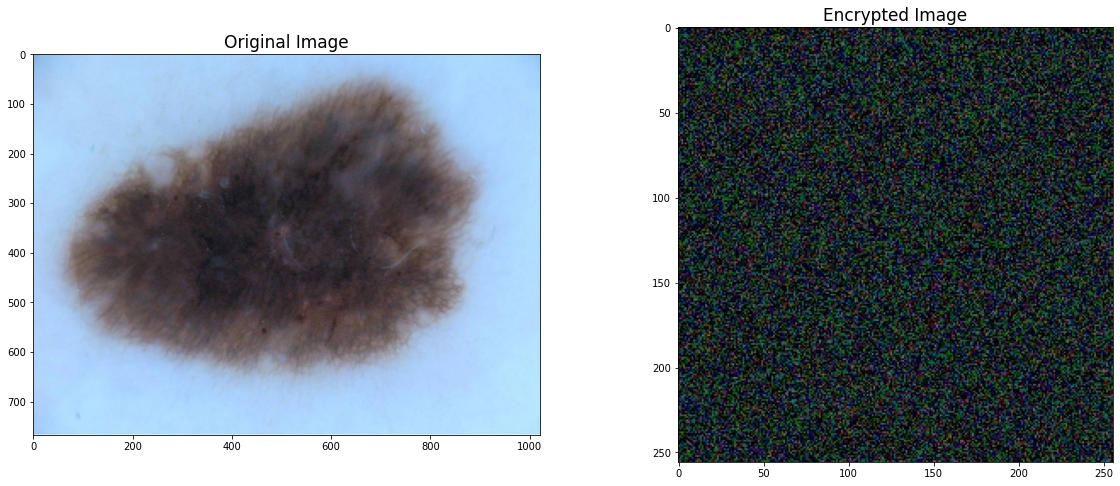

In [13]:
original_image = Image.open(f'{raw_dir}\\ISIC_0000000.jpg')
original_image = np.asarray(original_image)

encrypted_image = Image.open(f'{encrypted_dir}\\ISIC_0000000.jpg')
encrypted_image = np.asarray(encrypted_image)


plt.figure()

fig,ax = plt.subplots(1,2,figsize=(20,8))

ax[0].imshow(original_image)
ax[0].set_title('Original Image',fontsize = 17)

ax[1].imshow(encrypted_image)
ax[1].set_title('Encrypted Image',fontsize = 17)

plt.show()